# WELCOME TO MACHINE LEARNING TUTORIALS!
## Task: US Salary Prediction
### Author: SUNGHO LEE, Ph.D.
### Comments/feedbacks will be greatly appreciated!
### Contact Info: DRLEE7979@GMAIL.COM

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
#
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
#
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#
import statsmodels.formula.api as sm
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier

train=pd.read_csv('census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [2]:
#TODO
print(train['EducationNum'].nunique())
print(train['MaritalStatus'].nunique())
print(train['Occupation'].nunique())
print(train['Relationship'].nunique())
print(train['Race'].nunique())
print(train['Gender'].nunique())
print(train['Hours/Week'].nunique())
print(train['Country'].nunique())
print(train['Income'].nunique())


16
7
15
6
5
2
96
42
4


<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [3]:
# Command (s): remove the '?' special character and replace with NaN
#TODO

Index_bad = (train['Occupation']=="?")# | (train[]=="NA") | (train[]==" ")
#print(Index_bad.info())
#print(Index_bad.describe())
#Index_bad.head()
Index_bad.sum()

train.loc[Index_bad,'Occupation']="NaN"

#num=train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns
#print(num)

In [4]:
train.head(20)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,NaN,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [5]:
#Command(s):
#replace missing values with their mode
MostOccuringValue=train['Occupation'].mode()
train.loc[Index_bad,'Occupation']=MostOccuringValue.values
#TODO
print(train.isnull().sum()) #checking the data after replacing NaN values .... should all show 0 now
print(train.head(20))

Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64
    Age  EducationNum       MaritalStatus         Occupation   Relationship  \
0    25             7       Never-married  Machine-op-inspct      Own-child   
1    38             9  Married-civ-spouse    Farming-fishing        Husband   
2    28            12  Married-civ-spouse    Protective-serv        Husband   
3    44            10  Married-civ-spouse  Machine-op-inspct        Husband   
4    18            10       Never-married     Prof-specialty      Own-child   
5    34             6       Never-married      Other-service  Not-in-family   
6    29             9       Never-married     Prof-specialty      Unmarried   
7    63            15  Married-civ-spouse     Prof-specialty        Husband   
8    24            10       Never-married      Other-service      Unmarried   
9    55

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [6]:
# converting Gender to "0" and "1" 
def gender_to_numeric(x):
    #TODO return 1 f gender is Male, 0 otherwise
    Index_1 = (x=="Male")
    x[Index_1]=1
    x[~Index_1]=0
    return x
        
gender_to_numeric(train['Gender']) #TODO apply the function to this column
print(train.head(20))

    Age  EducationNum       MaritalStatus         Occupation   Relationship  \
0    25             7       Never-married  Machine-op-inspct      Own-child   
1    38             9  Married-civ-spouse    Farming-fishing        Husband   
2    28            12  Married-civ-spouse    Protective-serv        Husband   
3    44            10  Married-civ-spouse  Machine-op-inspct        Husband   
4    18            10       Never-married     Prof-specialty      Own-child   
5    34             6       Never-married      Other-service  Not-in-family   
6    29             9       Never-married     Prof-specialty      Unmarried   
7    63            15  Married-civ-spouse     Prof-specialty        Husband   
8    24            10       Never-married      Other-service      Unmarried   
9    55             4  Married-civ-spouse       Craft-repair        Husband   
10   65             9  Married-civ-spouse  Machine-op-inspct        Husband   
11   36            13  Married-civ-spouse       Adm-

C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# converting Income to "0" and "1" 
def income_to_numeric(x):
    Index_1 = (x==">50K.")
    x[Index_1]=1
    x[~Index_1]=0
    return x
    #TODO return 1 f income is greater than 50k, 0 otherwise
    
income_to_numeric(train['Income']) #TODO apply the function to this column
print(train.head(20))


    Age  EducationNum       MaritalStatus         Occupation   Relationship  \
0    25             7       Never-married  Machine-op-inspct      Own-child   
1    38             9  Married-civ-spouse    Farming-fishing        Husband   
2    28            12  Married-civ-spouse    Protective-serv        Husband   
3    44            10  Married-civ-spouse  Machine-op-inspct        Husband   
4    18            10       Never-married     Prof-specialty      Own-child   
5    34             6       Never-married      Other-service  Not-in-family   
6    29             9       Never-married     Prof-specialty      Unmarried   
7    63            15  Married-civ-spouse     Prof-specialty        Husband   
8    24            10       Never-married      Other-service      Unmarried   
9    55             4  Married-civ-spouse       Craft-repair        Husband   
10   65             9  Married-civ-spouse  Machine-op-inspct        Husband   
11   36            13  Married-civ-spouse       Adm-

C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
# renaming column name 'Hours/Week' into 'HoursPerWeek'
# this is because sm.logit model below, it can't recognize the name Hours/Week due to the '/' symbol
train.rename(columns={'Hours/Week': 'HoursPerWeek'}, inplace=True)
train.head(10)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,HoursPerWeek,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,0
5,34,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,0
6,29,9,Never-married,Prof-specialty,Unmarried,Black,1,40,United-States,0
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,1,32,United-States,1
8,24,10,Never-married,Other-service,Unmarried,White,0,40,United-States,0
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,1,10,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [9]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    train[obj.columns[i]] = le.fit_transform(train[obj.columns[i]]) #TODO  #Encode input data
    
train.head(10) #Inspect the data, all features should be numeric now

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,HoursPerWeek,Country,Income
0,25,7,4,6,3,2,1,40,39,0
1,38,9,2,4,0,4,1,50,39,0
2,28,12,2,10,0,4,1,40,39,1
3,44,10,2,6,0,2,1,40,39,1
4,18,10,4,9,3,4,0,30,39,0
5,34,6,4,7,1,4,1,30,39,0
6,29,9,4,9,4,2,1,40,39,0
7,63,15,2,9,0,4,1,32,39,1
8,24,10,4,7,4,4,0,40,39,0
9,55,4,2,2,0,4,1,10,39,0


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [10]:
r = 0.3 # ratio of test data over all data
X, XX, Y, YY = train_test_split(train.iloc[:,:-1],train.iloc[:,-1], test_size=0.3)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

In [11]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
#
import statsmodels.formula.api as sm

#
X_train = X
y_train = Y
X_test = XX
y_test = YY

#
data_train = X_train
data_train['Income']=Y
data_train.head(10)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,HoursPerWeek,Country,Income
31567,70,11,4,9,1,4,1,30,39,0
8108,34,10,0,13,1,4,1,66,39,0
37922,52,16,2,3,0,4,1,38,39,0
38865,21,9,4,13,1,4,1,60,39,0
10190,67,9,6,3,1,4,0,35,39,0
14821,18,9,4,4,3,4,1,25,39,0
18414,27,14,4,3,1,4,0,25,39,0
40665,51,10,2,2,0,4,1,60,39,0
9629,30,7,4,2,1,4,1,40,39,0
47939,17,6,4,11,4,4,0,24,39,0


Optimization terminated successfully.
         Current function value: 0.245531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.245531
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Income   No. Observations:                34189
Model:                          Logit   Df Residuals:                    34179
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Nov 2018   Pseudo R-squ.:                  0.1183
Time:                        00:26:56   Log-Likelihood:                -8394.5
converged:                       True   LL-Null:                       -9520.8
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------


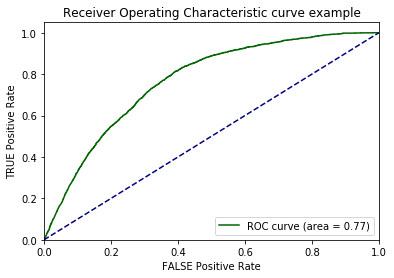

In [12]:
LR_model_2 = sm.logit(formula = 'Income ~ Age + EducationNum + MaritalStatus + Occupation + Relationship + Race + Gender + HoursPerWeek + Country', data=data_train)
y_pred_2 = LR_model_2.fit().predict()
results_2 = LR_model_2.fit()
print(results_2.summary())
#
TargetLabels=y_train
PredictedProb=y_pred_2
#
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color
#
fpr, tpr, th = roc_curve(TargetLabels, PredictedProb) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
print ("\nAUC:", np.round(AUC,3))
#
# Plotting
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

In [13]:
# dropping 'Income' column. For some reason, a new column 'Income' has been added to X somewhere above which is a little strange.
X = X.drop('Income',1)

actual class values:
48250    0
46338    0
24761    0
19322    0
16461    0
7900     0
4682     0
20693    0
15162    1
567      0
38296    0
35235    0
43833    0
35147    0
891      0
47634    0
33760    0
33414    0
18520    0
3077     0
5705     1
29032    0
8216     0
13831    0
2486     0
16830    0
3118     0
23696    0
20076    0
7328     0
        ..
30527    0
7034     1
30604    0
32392    0
3310     0
20976    0
38856    0
31996    0
40652    0
23614    0
36796    0
5213     0
3965     1
35919    0
9126     0
41608    0
6180     0
47101    0
46272    0
10014    0
7742     0
20945    0
48504    0
30860    0
14254    0
9208     1
29111    0
23476    0
48108    0
20970    0
Name: Income, Length: 14653, dtype: int64
predictions for test set:
[0 0 0 ... 0 0 0]
predicted Probability for test set:
[0.         0.         0.         ... 0.         0.4        0.13333333]

TP rates: [0.   0.   0.01 0.03 0.09 0.17 0.32 0.51 0.69 0.86 1.  ]

FP rates: [0.   0.   0.   0.01 0.02 0.05 0.1 

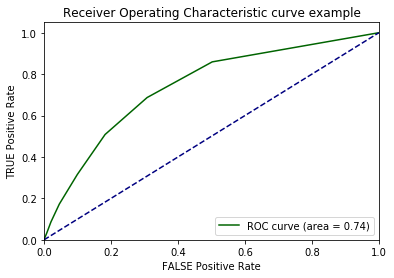

In [14]:
k = 15 # number of neighbors
distance_metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
results_3=knn.fit(X, Y)
#
TargetLabels=YY
PredictedLabels=knn.predict(XX)
PredictedProb=knn.predict_proba(XX)[:,1]
print ('actual class values:')
print (TargetLabels)
print ("predictions for test set:")
print (PredictedLabels)
print ("predicted Probability for test set:")
print (PredictedProb)

#
#
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color
#
fpr, tpr, th = roc_curve(TargetLabels, PredictedProb) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
print ("\nAUC:", np.round(AUC,3))
#
# Plotting
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [ ]:
from sklearn.feature_selection import RFE

rfe =  #TODO
# TODO: fit X_train and y_train

y_pred = # TODO
lr_acc = #TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc =#TODO
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))